In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('country.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
columns=df.columns

In [6]:
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df2=df.drop('country',axis=1)

In [9]:
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
columns1=df2.columns

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

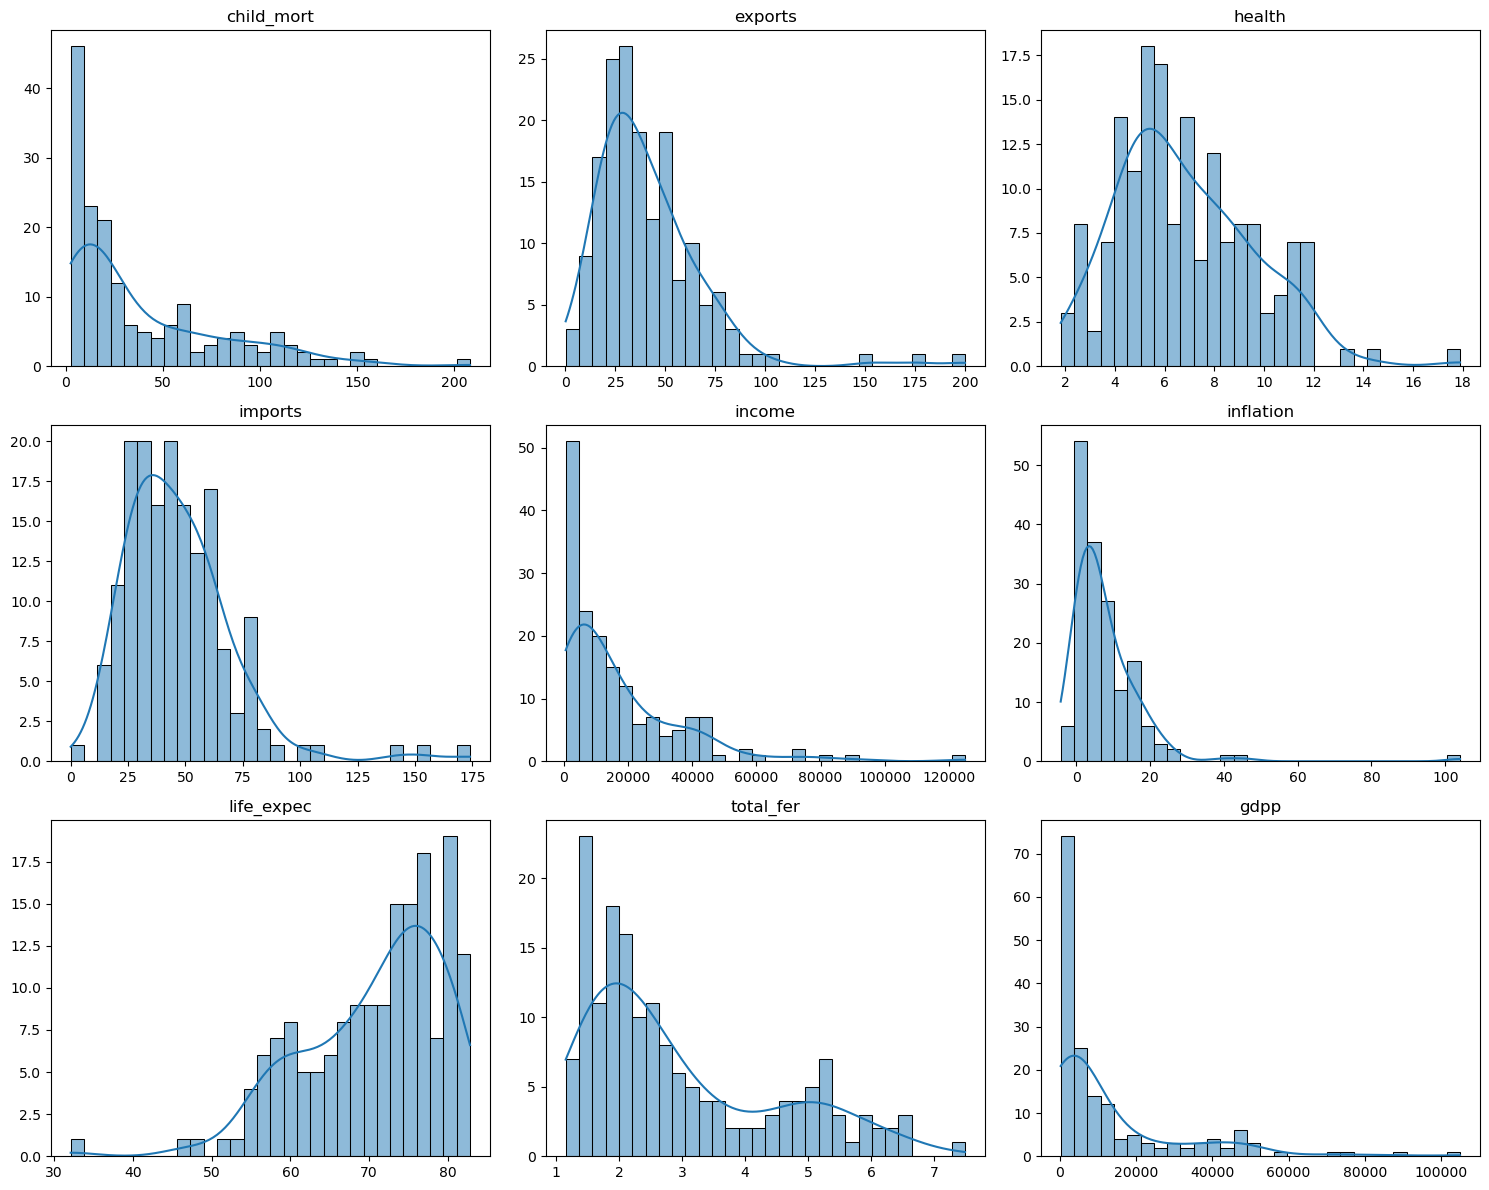

In [13]:
plot_all_histograms(df)

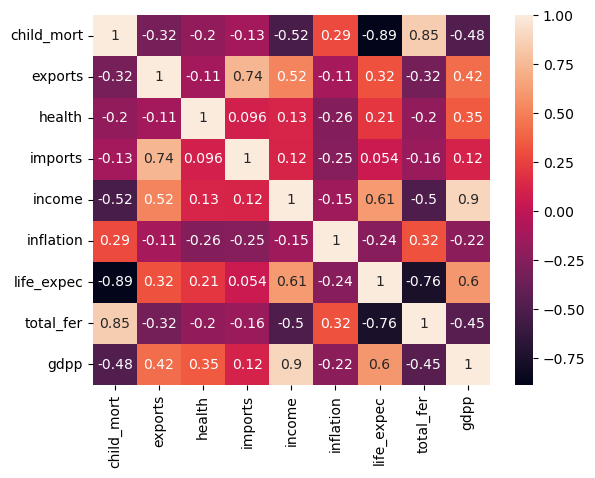

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
X_scaled=scaler.fit_transform(df2)

In [18]:
df2=pd.DataFrame(df2, columns=columns1)

In [19]:
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


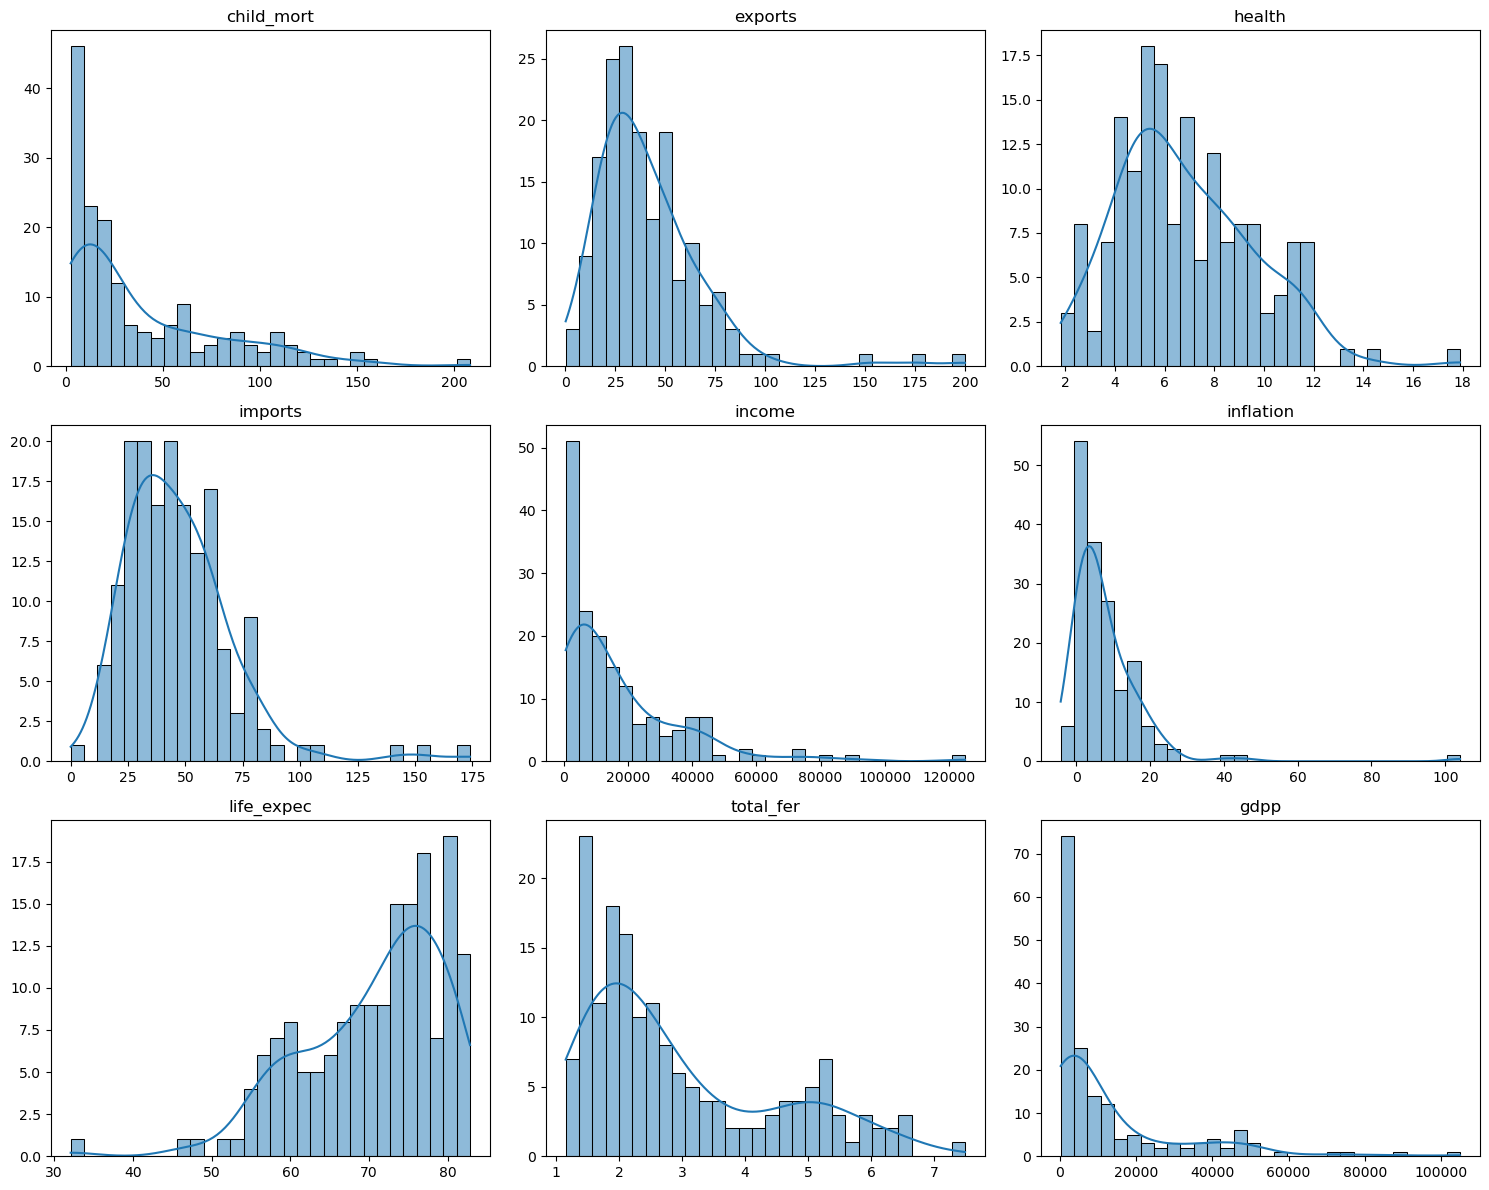

In [20]:
plot_all_histograms(df2)

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan=DBSCAN()

In [23]:
dbscan.fit(X_scaled)

DBSCAN()

In [24]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [25]:
from sklearn.cluster import HDBSCAN

In [26]:
hdbscan=HDBSCAN()

In [27]:
##its not good working

In [28]:
hdbscan.fit(X_scaled)

HDBSCAN()

In [29]:
labels=hdbscan.labels_

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(X_scaled,labels)

0.0981732498015804

In [32]:
min_cluster_sizes = [3, 5, 7, 10]
min_samples = [None, 3, 5, 7]

In [33]:
results = []

for min_cluster in min_cluster_sizes:
    for min_sample in min_samples:
        hdb = HDBSCAN(min_cluster_size=min_cluster, min_samples=min_sample).fit(X_scaled)
        labels = hdb.labels_
        # Skip if all points are noise or only one cluster found
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X_scaled, labels)
        
        results.append({
            'min_cluster_size': min_cluster,
            'min_samples': min_sample,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        })

# Convert to DataFrame and sort by silhouette 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [34]:
results_df

,min_cluster_size,min_samples,Silhouette,n_clusters
5,5,3.0,0.140389,3
9,7,3.0,0.140389,3
13,10,3.0,0.140389,3
0,3,NaN,0.103444,4
1,3,3.0,0.103444,4
2,3,5.0,0.098173,3
4,5,NaN,0.098173,3
6,5,5.0,0.098173,3
10,7,5.0,0.098173,3
14,10,5.0,0.098173,3


In [35]:
hdbscan=HDBSCAN(min_samples=5)

In [36]:
hdbscan.fit(X_scaled)

HDBSCAN(min_samples=5)

In [37]:
labels1=hdbscan.labels_

In [38]:
labels1

array([ 0,  1,  1, -1,  1, -1,  1,  2,  2, -1,  1, -1,  1,  1, -1, -1,  1,
        0,  1,  1,  1, -1, -1, -1,  1,  0, -1,  1,  0,  2,  1, -1, -1,  1,
        1,  1,  0, -1, -1,  1,  0,  1, -1,  1,  2,  1,  1,  1,  1, -1, -1,
        1,  1,  2,  2, -1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1, -1,  1,
        2,  1,  1,  1, -1, -1, -1,  2,  1,  2, -1,  1,  0, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  0,  0, -1,  1,  0, -1, -1,  1, -1,
       -1, -1,  1,  1,  0, -1, -1,  1, -1,  2, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  2, -1,  1, -1, -1, -1, -1,  0,  1, -1, -1, -1,  1, -1,
       -1, -1,  1,  2, -1,  1, -1,  1,  2, -1, -1,  0,  1, -1, -1, -1,  1,
        1, -1,  0,  1, -1,  2, -1,  1,  1,  1, -1, -1, -1,  0])

In [39]:
silhouette_score(X_scaled,labels1)

0.0981732498015804

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

In [42]:
wcss

[117459687469.07819,
 36528387934.3221,
 24453781336.354897,
 15081768961.649033,
 10956489943.59941,
 8665234153.41711,
 5665581158.649071,
 4348719192.189959,
 3351545024.7134075,
 2906309565.5209765]

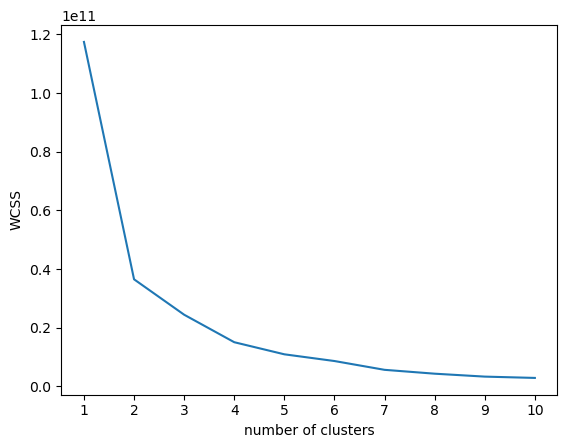

In [43]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [44]:
model = KMeans(n_clusters=4)
model.fit(df2)

KMeans(n_clusters=4)

In [45]:
labels2 = model.labels_

In [46]:
silhouette_score(df2,labels2)

0.5915166208351548

In [47]:
df['Class'] = labels

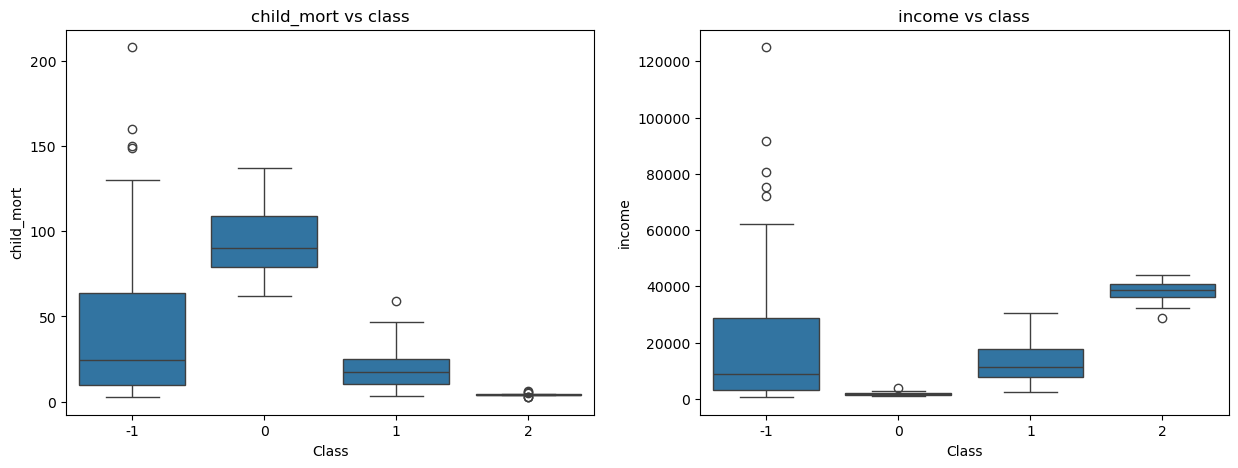

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols= 2 , figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Class", y="child_mort")
plt.title("child_mort vs class")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Class", y="income")
plt.title("income vs class")

plt.show()

In [49]:
# 0 -> no budget needed
# 1 -> budget needed
# 2 -> in between

In [50]:
import plotly.express as px

In [51]:
df2.insert(0, column= "Country", value = df['country'])

In [52]:
df2['Class'] = labels

In [53]:
df2.loc[df2['Class'] == 1, 'Class'] = "neccessary"
df2.loc[df2['Class'] == 2, 'Class'] = "In Between"
df2.loc[df2['Class'] == 0, 'Class'] = "absolutely necessary"
df2.loc[df2['Class'] == -1, 'Class'] = "no neccessary"

/var/folders/5w/j248_m9j4pnf2mlx7bt5bl000000gn/T/ipykernel_16760/1965920676.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'neccessary' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['Class'] == 1, 'Class'] = "neccessary"


In [54]:
df2

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,absolutely necessary
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,neccessary
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,neccessary
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,no neccessary
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,neccessary
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,no neccessary
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,no neccessary
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,no neccessary
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,no neccessary


In [55]:
df2.tail()

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,no neccessary
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,no neccessary
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,no neccessary
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,no neccessary
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,no neccessary


In [56]:
df2['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [57]:
indeksler = df2.index[df2["Country"] == "Australia"].tolist()
print(indeksler)  


[7]


In [58]:
df['Class'][7]

-1

In [117]:
indeksler = df2.index[df2["Country"] == "Canada"].tolist()
print(indeksler) 


[29]


In [119]:
df['Class'][29]

2

In [121]:
indeksler = df2.index[df2["Country"] == "Belgium"].tolist()
print(indeksler) 


[15]


In [123]:
df['Class'][15]

-1